# CM5

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy import stats

## Iris

In [37]:
df_iris = pd.read_csv('iris_dataset_missing.csv')

In [57]:
df_iris['sepal_width'].interpolate(method='linear', direction = 'forward', inplace=True) 
df_iris['petal_length'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [39]:
def minmax_scaling(a):
    xx=a
    a_std = (xx- xx.min(axis = 0)) / (xx.max(axis = 0) - xx.min(axis = 0))
    return a_std

In [40]:
def zscore(a):
    xx=a
    a_std = (xx- np.mean(xx)) / (np.std(xx))
    return a_std

In [41]:
mf_iris=df_iris.copy()
mf_iris['sepal_length']=minmax_scaling(mf_iris['sepal_length'])
mf_iris['sepal_width']=minmax_scaling(mf_iris['sepal_width'])
mf_iris['petal_length']=minmax_scaling(mf_iris['petal_length'])
mf_iris['petal_width']=minmax_scaling(mf_iris['petal_width'])

In [42]:
zf_iris=df_iris.copy()
zf_iris['sepal_length']=zscore(zf_iris['sepal_length'])
zf_iris['sepal_width']=zscore(zf_iris['sepal_width'])
zf_iris['petal_length']=zscore(zf_iris['petal_length'])
zf_iris['petal_width']=zscore(zf_iris['petal_width'])

### Without normalization 

In [43]:
train, test = train_test_split(df_iris, test_size = 0.2, stratify = df_iris['species'], random_state = 98)
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species
counter = 0
scoresMean = np.zeros(35)
scoresStd  = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    scoresMean[counter] = scores.mean()
    scoresStd[counter] = scores.std()
    counter = counter + 1

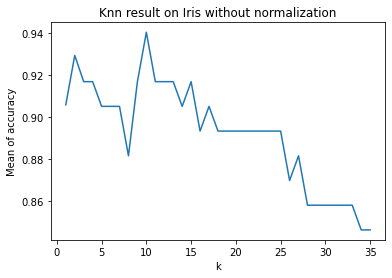

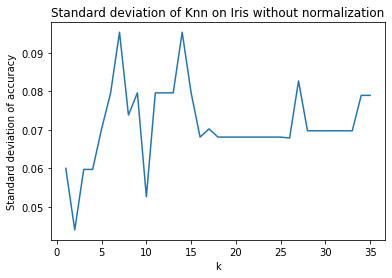

In [44]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on Iris without normalization')
plt.xlabel('k')
plt.ylabel('Mean of accuracy')
plt.show()
plt.plot(x, scoresStd)
plt.title('Standard deviation of Knn on Iris without normalization')
plt.xlabel('k')
plt.ylabel('Standard deviation of accuracy')
plt.show()

### By minmax

In [45]:
train, test = train_test_split(mf_iris, test_size = 0.2, stratify = mf_iris['species'], random_state = 98)
#corrmat = train.corr()
#sns.heatmap(corrmat, annot = True, square = True);
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species
counter = 0
scoresMean = np.zeros(35)
scoresStd  = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    scoresMean[counter] = scores.mean()
    scoresStd[counter] = scores.std()
    counter = counter + 1
    #print('K=',k,'and mean of accuracy is',scores.mean(),'and standard deviation is',scores.std(),'.')

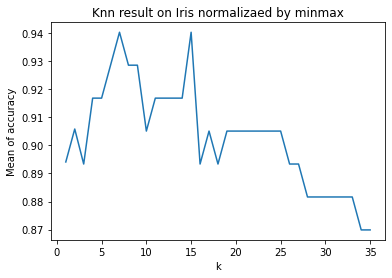

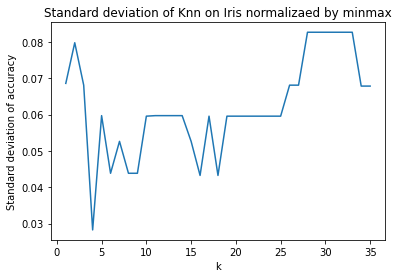

In [46]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on Iris normalizaed by minmax')
plt.xlabel('k')
plt.ylabel('Mean of accuracy')
plt.show()
plt.plot(x, scoresStd)
plt.title('Standard deviation of Knn on Iris normalizaed by minmax')
plt.xlabel('k')
plt.ylabel('Standard deviation of accuracy')
plt.show()

### By zscore

In [47]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

train, test = train_test_split(zf_iris, test_size = 0.2, stratify = zf_iris['species'], random_state = 98)
#corrmat = train.corr()
#sns.heatmap(corrmat, annot = True, square = True);
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species
counter = 0
scoresMean = np.zeros(35)
scoresStd  = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    scoresMean[counter] = scores.mean()
    scoresStd[counter] = scores.std()
    counter = counter + 1

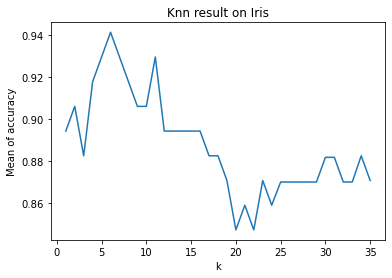

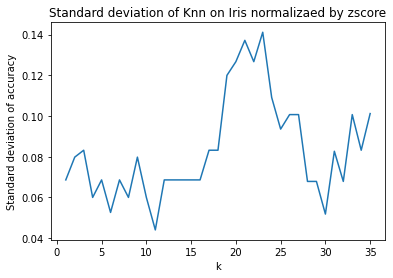

In [48]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on Iris')
plt.xlabel('k')
plt.ylabel('Mean of accuracy')
plt.show()
plt.plot(x, scoresStd)
plt.title('Standard deviation of Knn on Iris normalizaed by zscore')
plt.xlabel('k')
plt.ylabel('Standard deviation of accuracy')
plt.show()

## Heart disease

In [49]:
df = pd.read_csv('heart_disease_missing.csv')
if(df.isnull().values.any()):
    df = df.fillna(method = 'ffill')
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)]
df = df[[ 'cp', 'thalach', 'exang', 'oldpeak', 'target']]
df['oldpeak'].interpolate(method='linear', direction = 'forward', inplace=True) 

### Without normalization 

In [51]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values
X_t, X_test, y_t, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 98)
X_train, X_val, y_train, y_val =  train_test_split(X_t,y_t,test_size = 0.1, random_state= 98)
accuracy = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    y_pred1 = classifier.predict(X_val)
    accuracy[k-1] = metrics.accuracy_score(y_val, y_pred1)

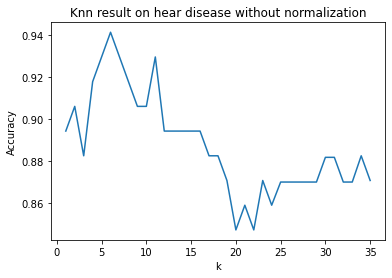

In [52]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on hear disease without normalization')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

#### By zscore

In [53]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values
X_t, X_test, y_t, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 98)
X_train, X_val, y_train, y_val =  train_test_split(X_t,y_t,test_size = 0.1, random_state= 98)
X_train = zscore(X_train)
X_test = zscore(X_test)
X_val = zscore(X_val)
accuracy = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    y_pred1 = classifier.predict(X_val)
    accuracy[k-1] = metrics.accuracy_score(y_val, y_pred1)

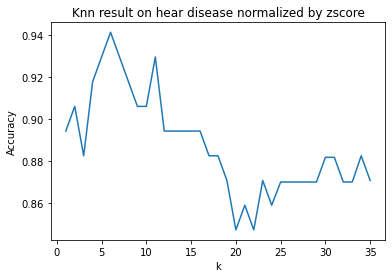

In [54]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on hear disease normalized by zscore')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

#### By minmax

In [55]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values
X_t, X_test, y_t, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 98)
X_train, X_val, y_train, y_val =  train_test_split(X_t,y_t,test_size = 0.1, random_state= 98)
X_train = minmax_scaling(X_train)
X_test = minmax_scaling(X_test)
X_val = minmax_scaling(X_val)
accuracy = np.zeros(35)
for k in range(1,36):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier = classifier.fit(X_train,y_train)
    y_pred1 = classifier.predict(X_val)
    accuracy[k-1] = metrics.accuracy_score(y_val, y_pred1)

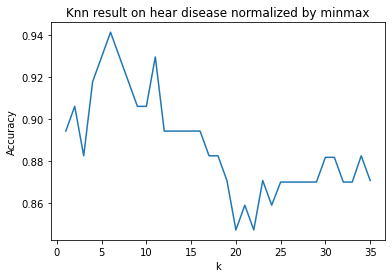

In [56]:
x = np.linspace(1, 35, 35)
plt.plot(x, scoresMean)
plt.title('Knn result on hear disease normalized by minmax')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Based on the results, for Iris data base accuracy of 94 % is reached with and without normalization. But with normalization number of neighborhoods is lower than without normalization. But for heart disease data base for 4 features, without normalization, the accuracy is better. 

## Refrences
https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html/2
https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html/2
https://www.w3resource.com/python-exercises/pandas/missing-values/python-pandas-missing-values-exercise-15.php